<a href="https://colab.research.google.com/github/arnabdas29/image-rekognition/blob/master/session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [0]:
img = cv2.imread("Lenna.jpg",0)
cv2.imwrite("Duplicate.jpg",img)

True

--------HISTOGRAM----------

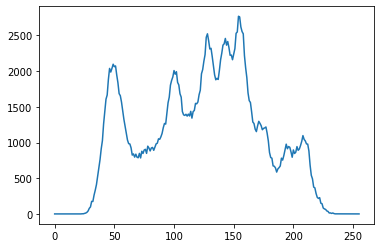

In [0]:
histo = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histo)

----------CROSS CORRELATION-----------

In [0]:
def crosscorr(a,b,r1,c1,r2,c2):
  r = int(r1-r2+1)
  c = int(c1-c2+1)
  row = int(r2/2)
  col = int(c2/2)

  co = np.zeros((r,c),dtype = int)

  for i in range(0,r):
    for j in range(0,c):
      val = 0
      for x in range(-row,row+1):
        for y in range(-col,col+1):
          val = val + (a[i+x,j+y]*b[x,y])
      co[i,j] = val
  return co

In [0]:
a = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]]) #img matrix
b = np.array([[1,2,3],[4,5,6],[7,8,9]]) #kernel

ca = crosscorr(a,b,5,5,3,3)
print(ca)

[[687 642 687]
 [312 267 312]
 [537 492 537]]


-----------CONVOLUTION-----------

In [0]:
c = np.zeros((3,3),dtype = int)
d = np.zeros((3,3),dtype = int)
for i in range(0,3):
  for j in range(0,3):
    c[i,j] = b[j,i]

print(c)

for i in range(0,3):
  for j in range(0,3):
    d[i,j] = c[2-i,2-j]
print(d)

cc = np.transpose(d)
print(cc)

[[1 4 7]
 [2 5 8]
 [3 6 9]]
[[9 6 3]
 [8 5 2]
 [7 4 1]]
[[9 8 7]
 [6 5 4]
 [3 2 1]]


In [0]:
cb = crosscorr(a,cc,5,5,3,3)
print(cb)

[[303 288 333]
 [378 363 408]
 [603 588 633]]


before both the convolution and cross correlation will delete data...i.e., by N-1(size of kernel) of the orig img

to avoid that we do padding.

--------------EDGE DETECTION------------

In [0]:
#2nd derivative edge detection
new_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]]) #edge detection kernel, same for most cases

edge = crosscorr(img,new_kernel,512,512,3,3)#detecting the edge of lenna.jpg
cv2.imwrite("2ndderi.jpg",edge)

True

In [0]:
#sobel horizontal edge detection 
Gx = np.array((1,0,-1,2,0,-2,1,0,-1))
Gx = Gx.reshape(3,3)
print(Gx)

temp1 = crosscorr(img,Gx,512,512,3,3)
cv2.imwrite("Sobel hori.jpg",temp)

#sobel vertical edge detection 
Gy = np.array((1,2,1,0,0,0,-1,-2,-1))
Gy = Gy.reshape(3,3)
print(Gy)

temp2 = crosscorr(img,Gy,512,512,3,3)
cv2.imwrite("Sobel verti.jpg",temp)

#comlpete sobel edge detection
g = np.sqrt(np.power(temp1,2)+np.power(temp2,2))
g = g.astype(np.uint8)
cv2.imwrite("Sobel.jpg",g)


[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


True

-------HISTOGRAM EQUALISATION----------

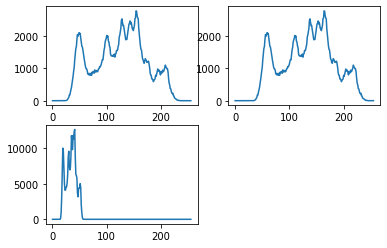

In [0]:
img = cv2.imread("Lenna.jpg",0)
img_bright = img + 10    #increasing brightness
img_contr = img*0.2 + 10  #increasing contrast
img_contr=img_contr.astype(np.uint8)
histo1 = cv2.calcHist([img],[0],None,[256],[0,256]) 
histo2 = cv2.calcHist([img_bright],[0],None,[256],[0,256])
histo3 = cv2.calcHist([img_contr],[0],None,[256],[0,256])
cv2.imwrite("Bright_lenna.jpg",img_bright)
cv2.imwrite("Contr lenna.jpg",img_contr)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #converting RGB to BGR

plt.imshow(img)
plt.subplot(221)
plt.plot(histo1)
plt.subplot(222)
plt.plot(histo2)
plt.subplot(223)
plt.plot(histo3)